In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import warnings
warnings.filterwarnings(action="ignore")
import pandas_profiling

In [2]:
raw_data1 = pd.read_excel("./Data_Train.xlsx")
test_data = pd.read_excel("./Data_Test.xlsx")
raw_data1['source'] = 'train'
test_data['source'] = 'test'
raw_data = pd.concat([raw_data1,test_data],ignore_index=True)

In [3]:
raw_data1

,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,New_Price,Price,source
0,Maruti Wagon R LXI CNG,Mumbai,2010,72000,CNG,Manual,First,26.6 km/kg,998 CC,58.16 bhp,5.0,NaN,1.75,train
1,Hyundai Creta 1.6 CRDi SX Option,Pune,2015,41000,Diesel,Manual,First,19.67 kmpl,1582 CC,126.2 bhp,5.0,NaN,12.50,train
2,Honda Jazz V,Chennai,2011,46000,Petrol,Manual,First,18.2 kmpl,1199 CC,88.7 bhp,5.0,8.61 Lakh,4.50,train
3,Maruti Ertiga VDI,Chennai,2012,87000,Diesel,Manual,First,20.77 kmpl,1248 CC,88.76 bhp,7.0,NaN,6.00,train
4,Audi A4 New 2.0 TDI Multitronic,Coimbatore,2013,40670,Diesel,Automatic,Second,15.2 kmpl,1968 CC,140.8 bhp,5.0,NaN,17.74,train
5,Hyundai EON LPG Era Plus Option,Hyderabad,2012,75000,LPG,Manual,First,21.1 km/kg,814 CC,55.2 bhp,5.0,NaN,2.35,train
6,Nissan Micra Diesel XV,Jaipur,2013,86999,Diesel,Manual,First,23.08 kmpl,1461 CC,63.1 bhp,5.0,NaN,3.50,train
7,Toyota Innova Crysta 2.8 GX AT 8S,Mumbai,2016,36000,Diesel,Automatic,First,11.36 kmpl,2755 CC,171.5 bhp,8.0,21 Lakh,17.50,train
8,Volkswagen Vento Diesel Comfortline,Pune,2013,64430,Diesel,Manual,First,20.54 kmpl,1598 CC,103.6 bhp,5.0,NaN,5.20,train
9,Tata Indica Vista Quadrajet LS,Chennai,2012,65932,Diesel,Manual,Second,22.3 kmpl,1248 CC,74 bhp,5.0,NaN,1.95,train


In [4]:
print("The train shape is", raw_data1.shape)
print("The test shape is", test_data.shape)

The train shape is (6019, 14)
The test shape is (1234, 13)


In [5]:
pandas_profiling.ProfileReport(raw_data1)

Number of variables,14
Number of observations,6019
Total Missing (%),6.3%
Total size in memory,658.4 KiB
Average record size in memory,112.0 B
Numeric,4
Categorical,9
Boolean,0
Date,0
Text (Unique),0
Rejected,1


In [6]:
pandas_profiling.ProfileReport(raw_data)

Number of variables,14
Number of observations,7253
Total Missing (%),7.5%
Total size in memory,793.4 KiB
Average record size in memory,112.0 B
Numeric,4
Categorical,10
Boolean,0
Date,0
Text (Unique),0
Rejected,0


# Intial Investigation results and next steps !!

### 1. Name : -
      The name of the car is having a high cardinality, the next step here is to extract brand/manfratrer.
   
### 2. Kilometers_Driven: - 
       Highly skewed feature, next steps pending...

### 3. Mileage : -
       Convert this field to numeric and investigate there are some values which are seen to have a value 0, 0 milage for a car sounds bad data.

### 4. Engine CC :- 
        We can bucket this feature, the steps to bucketing still not decided.

### 5. Power : - 
       Convert this field to numeric and investigate.

### 6. New_price : -
       This feature has 86% missing values, at this point this feature will be elminated.
       
### 7. Price : -
       Check website for the units for this independent feature.
       
### 8. Location/Transmission/Owner_type/Seats : -
       These are all categoric variables.

### 9. Year : - 
       Investigate if this is the year the car was sold or bought.


###  Let us begin by converting the Mileage and Power feature 

In [7]:
raw_data['Power'].isnull().sum()

46

In [8]:
raw_data['Power'].fillna('0xgb', inplace=True)

In [9]:
raw_data['Power'].isnull().sum()

0

In [10]:
raw_data['Mileage']=raw_data['Mileage'].str.replace('[^\d.]','').astype(float)
raw_data['Power']=raw_data['Power'].str.replace('[^\d.]','')

In [11]:
raw_data['Power'].isnull().sum()

0

In [12]:
#raw_data['Mileage'].replace(regex=True,inplace=True,to_replace=r'\D.\D',value=r'')
#raw_data['Power'].replace(regex=True,inplace=True,to_replace=r'\D.\D',value=r'')

In [13]:
#raw_data["Mileage"] = pd.to_numeric(raw_data["Mileage"])
raw_data["Power"] = pd.to_numeric(raw_data["Power"])

### NOTE AFTER CONVERTING THE COLUMN TO NUMERIC WE HAVE 129 nan values in POWER column,should think what needs to be done here

In [14]:
raw_data['Power'].isnull().sum()

129

In [15]:
raw_data['Power'].fillna(0, inplace=True)

In [16]:
raw_data['Power'].isnull().sum()

0

In [17]:
pandas_profiling.ProfileReport(raw_data[['Mileage','Power']])

Number of variables,2
Number of observations,7253
Total Missing (%),0.0%
Total size in memory,113.4 KiB
Average record size in memory,16.0 B
Numeric,2
Categorical,0
Boolean,0
Date,0
Text (Unique),0
Rejected,0


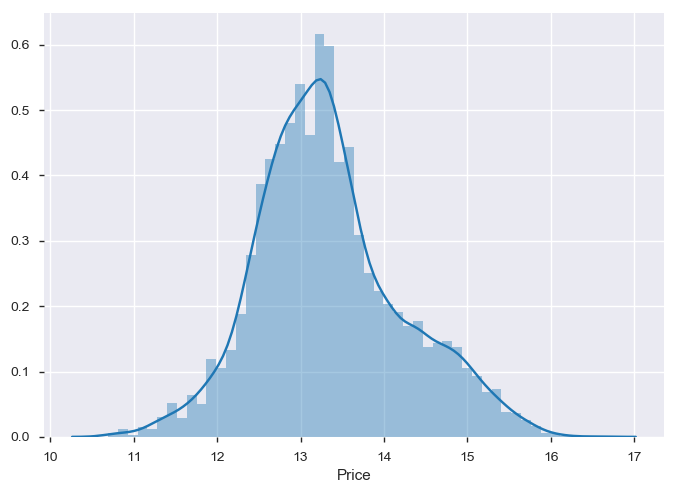

In [18]:
sns.distplot(np.log(raw_data1['Price'] * 100000))

In [19]:
pandas_profiling.ProfileReport(raw_data1[['Price']] * 100000 )

Number of variables,1
Number of observations,6019
Total Missing (%),0.0%
Total size in memory,47.1 KiB
Average record size in memory,8.0 B
Numeric,1
Categorical,0
Boolean,0
Date,0
Text (Unique),0
Rejected,0


In [20]:
raw_data.corr()['Price']

Kilometers_Driven   -0.011493
Mileage             -0.306593
Power                0.751724
Price                1.000000
Seats                0.052225
Year                 0.305327
Name: Price, dtype: float64

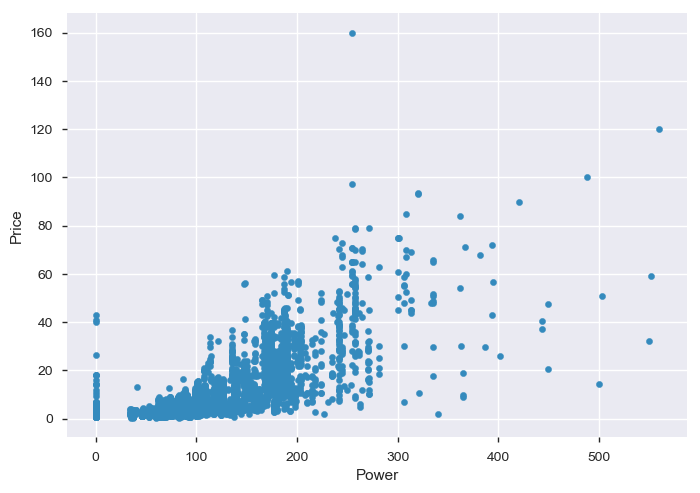

In [21]:
raw_data.plot.scatter(x ='Power', y='Price')

In [22]:
raw_data

,Engine,Fuel_Type,Kilometers_Driven,Location,Mileage,Name,New_Price,Owner_Type,Power,Price,Seats,Transmission,Year,source
0,998 CC,CNG,72000,Mumbai,26.60,Maruti Wagon R LXI CNG,NaN,First,58.16,1.75,5.0,Manual,2010,train
1,1582 CC,Diesel,41000,Pune,19.67,Hyundai Creta 1.6 CRDi SX Option,NaN,First,126.20,12.50,5.0,Manual,2015,train
2,1199 CC,Petrol,46000,Chennai,18.20,Honda Jazz V,8.61 Lakh,First,88.70,4.50,5.0,Manual,2011,train
3,1248 CC,Diesel,87000,Chennai,20.77,Maruti Ertiga VDI,NaN,First,88.76,6.00,7.0,Manual,2012,train
4,1968 CC,Diesel,40670,Coimbatore,15.20,Audi A4 New 2.0 TDI Multitronic,NaN,Second,140.80,17.74,5.0,Automatic,2013,train
5,814 CC,LPG,75000,Hyderabad,21.10,Hyundai EON LPG Era Plus Option,NaN,First,55.20,2.35,5.0,Manual,2012,train
6,1461 CC,Diesel,86999,Jaipur,23.08,Nissan Micra Diesel XV,NaN,First,63.10,3.50,5.0,Manual,2013,train
7,2755 CC,Diesel,36000,Mumbai,11.36,Toyota Innova Crysta 2.8 GX AT 8S,21 Lakh,First,171.50,17.50,8.0,Automatic,2016,train
8,1598 CC,Diesel,64430,Pune,20.54,Volkswagen Vento Diesel Comfortline,NaN,First,103.60,5.20,5.0,Manual,2013,train
9,1248 CC,Diesel,65932,Chennai,22.30,Tata Indica Vista Quadrajet LS,NaN,Second,74.00,1.95,5.0,Manual,2012,train


In [23]:
Models = []
for i in raw_data['Name'].values:
    tmp_list = i.split(" ")
    print(tmp_list)
    for j in tmp_list:
     Models.append(j)
    #break

['Maruti', 'Wagon', 'R', 'LXI', 'CNG']
['Hyundai', 'Creta', '1.6', 'CRDi', 'SX', 'Option']
['Honda', 'Jazz', 'V']
['Maruti', 'Ertiga', 'VDI']
['Audi', 'A4', 'New', '2.0', 'TDI', 'Multitronic']
['Hyundai', 'EON', 'LPG', 'Era', 'Plus', 'Option']
['Nissan', 'Micra', 'Diesel', 'XV']
['Toyota', 'Innova', 'Crysta', '2.8', 'GX', 'AT', '8S']
['Volkswagen', 'Vento', 'Diesel', 'Comfortline']
['Tata', 'Indica', 'Vista', 'Quadrajet', 'LS']
['Maruti', 'Ciaz', 'Zeta']
['Honda', 'City', '1.5', 'V', 'AT', 'Sunroof']
['Maruti', 'Swift', 'VDI', 'BSIV']
['Land', 'Rover', 'Range', 'Rover', '2.2L', 'Pure']
['Land', 'Rover', 'Freelander', '2', 'TD4', 'SE']
['Mitsubishi', 'Pajero', 'Sport', '4X4']
['Honda', 'Amaze', 'S', 'i-Dtech']
['Maruti', 'Swift', 'DDiS', 'VDI']
['Renault', 'Duster', '85PS', 'Diesel', 'RxL', 'Plus']
['Mercedes-Benz', 'New', 'C-Class', 'C', '220', 'CDI', 'BE', 'Avantgare']
['BMW', '3', 'Series', '320d']
['Maruti', 'S', 'Cross', 'DDiS', '200', 'Alpha']
['Audi', 'A6', '2011-2015', '35', 'TF

['Toyota', 'Camry', 'Hybrid']
['Maruti', 'Wagon', 'R', 'VXI']
['Mercedes-Benz', 'E-Class', 'E270', 'CDI']
['Maruti', 'Baleno', 'Zeta', 'Automatic']
['Honda', 'Jazz', '1.2', 'VX', 'i', 'VTEC']
['Mahindra', 'Scorpio', 'S10', 'AT', '4WD']
['Volkswagen', 'Polo', '1.2', 'MPI', 'Trendline']
['Hyundai', 'i20', '1.2', 'Era']
['Toyota', 'Camry', 'W4', '(AT)']
['Maruti', 'Wagon', 'R', 'VXI']
['BMW', '5', 'Series', '2013-2017', '520d', 'M', 'Sport']
['Maruti', 'Alto', 'K10', 'VXI', 'AGS']
['Mercedes-Benz', 'New', 'C-Class', '220', 'CDI', 'AT']
['Maruti', 'Alto', '800', '2016-2019', 'LXI']
['Maruti', 'Swift', 'VXI']
['Chevrolet', 'Sail', 'Hatchback', '1.2', 'LS', 'ABS']
['Hyundai', 'i20', 'Asta', '1.4', 'CRDi', '(Diesel)']
['Skoda', 'Superb', '2.5', 'TDi', 'AT']
['Toyota', 'Corolla', 'Altis', 'D-4D', 'G']
['Toyota', 'Fortuner', '4x2', 'Manual']
['Skoda', 'Rapid', '1.6', 'MPI', 'AT', 'Elegance']
['Honda', 'Brio', '1.2', 'VX', 'AT']
['Volkswagen', 'Polo', 'Petrol', 'Comfortline', '1.2L']
['Volkswage

['Hyundai', 'Grand', 'i10', 'AT', 'Asta']
['BMW', 'X3', 'xDrive30d', 'M', 'Sport']
['Maruti', '1000', 'AC']
['Hyundai', 'i20', 'Magna']
['Hyundai', 'Grand', 'i10', 'AT', 'Asta']
['Hyundai', 'Santro', 'Xing', 'XG']
['Ford', 'Fiesta', '1.5', 'TDCi', 'Titanium']
['Mercedes-Benz', 'E-Class', '220', 'CDI']
['Maruti', 'Swift', 'Dzire', 'VDI']
['Toyota', 'Etios', 'VXD']
['Hyundai', 'Xcent', '1.2', 'Kappa', 'Base']
['Honda', 'Civic', '2006-2010', '1.8', 'S', 'MT']
['Toyota', 'Innova', '2.5', 'GX', '(Diesel)', '8', 'Seater']
['Hyundai', 'Accent', 'GLE']
['Maruti', 'Alto', '800', 'LXI']
['Mercedes-Benz', 'SL-Class', 'SL', '500']
['Ford', 'Ecosport', '1.5', 'DV5', 'MT', 'Titanium', 'Optional']
['Hyundai', 'Xcent', '1.2', 'VTVT', 'E']
['Skoda', 'Rapid', '1.6', 'MPI', 'AT', 'Ambition', 'Plus']
['Audi', 'Q3', '2012-2015', '35', 'TDI', 'Quattro', 'Premium', 'Plus']
['Mahindra', 'XUV500', 'W8', '2WD']
['Hyundai', 'Verna', 'VTVT', '1.6', 'SX', 'Option']
['Hyundai', 'Verna', 'Xi', '(Petrol)']
['Ford', '

In [24]:
len(Models)

35093

In [25]:
from collections import Counter

In [26]:
probabale_model_name = []
for i in Counter(Models).most_common(30):
    probabale_model_name.append(i[0])

In [27]:
probabale_model_name
trimmed_list = ['Maruti','Hyundai','Honda','Toyota','Mercedes-Benz',
               'Volkswagen','Ford','Mahindra','BMW','Audi','Tata','Nissan','Rover',
               'Datsun','Chevrolet','Skoda','Fiat','Cooper','Jaguar',
               'Mitsubishi','Porsche','Ambassador','Renault','Volvo','Jeep',
               'Bentley','Lamborghini','ISUZU','Force']

In [28]:
for i in raw_data['Name'].values:
    ii = i.split(" ") 
    #print(i)
    #print(ii)
    tmp_list = [j for j in trimmed_list if j not in ii]
    #print(tmp_list)
    if(len(tmp_list) == 29):
        print(ii)
    #break

['Smart', 'Fortwo', 'CDI', 'AT']
['Isuzu', 'MUX', '4WD']
['Hindustan', 'Motors', 'Contessa', '2.0', 'DSL']
['Isuzu', 'MU', '7', '4x2', 'HIPACK']
['OpelCorsa', '1.4Gsi']


In [29]:
len(trimmed_list)

29

In [30]:
Car_Brand_Name = []
for i in raw_data['Name'].values:
    ii = i.split(" ") 
    #print(i)
    #print(ii)
    tmp_list = [j for j in trimmed_list if j in ii]
    try:
     print(tmp_list[0])
     Car_Brand_Name.append(tmp_list[0])
    except:
        Car_Brand_Name.append("Unk")
    #if(len(tmp_list) == 29):
        #print(ii)
    #break

Maruti
Hyundai
Honda
Maruti
Audi
Hyundai
Nissan
Toyota
Volkswagen
Tata
Maruti
Honda
Maruti
Rover
Rover
Mitsubishi
Honda
Maruti
Renault
Mercedes-Benz
BMW
Maruti
Audi
Hyundai
Volkswagen
Honda
Nissan
Maruti
Honda
Toyota
Renault
Toyota
Mahindra
Audi
Volkswagen
Maruti
Maruti
Mahindra
Mercedes-Benz
Volkswagen
Maruti
Tata
Mahindra
Hyundai
Hyundai
Toyota
Hyundai
Toyota
Hyundai
Mahindra
Audi
Maruti
Maruti
Maruti
Hyundai
Volkswagen
Renault
Hyundai
Nissan
Maruti
Toyota
Ford
Mercedes-Benz
Mercedes-Benz
Tata
Audi
Honda
Mercedes-Benz
Maruti
Hyundai
Porsche
Mahindra
Hyundai
Nissan
Honda
Audi
Ford
Toyota
Toyota
Hyundai
Maruti
Tata
Honda
Ford
Maruti
Honda
BMW
Hyundai
Hyundai
Hyundai
Honda
Toyota
Audi
Ford
Mahindra
Honda
Volkswagen
Hyundai
Maruti
Volkswagen
Hyundai
Hyundai
Datsun
Audi
Hyundai
Maruti
Toyota
Jaguar
Mahindra
Hyundai
Toyota
Maruti
Tata
BMW
Honda
Toyota
Volvo
Nissan
BMW
Maruti
Hyundai
Mercedes-Benz
Hyundai
Maruti
Tata
Mahindra
Mercedes-Benz
Maruti
Honda
Volkswagen
Maruti
Mahindra
Maruti
Maru

Maruti
Maruti
Hyundai
Nissan
Hyundai
Jeep
Volkswagen
Honda
BMW
BMW
Honda
Mahindra
Maruti
Maruti
Honda
Hyundai
Tata
Hyundai
Hyundai
Volvo
Ford
Maruti
Hyundai
Maruti
Porsche
Maruti
Honda
Chevrolet
Hyundai
Honda
Maruti
Ford
BMW
Hyundai
Toyota
Maruti
Maruti
Maruti
Maruti
BMW
Mahindra
Hyundai
Honda
Hyundai
Mercedes-Benz
Toyota
Honda
Maruti
Maruti
Hyundai
Maruti
Toyota
Jeep
Hyundai
Maruti
Tata
Maruti
Tata
Maruti
Maruti
BMW
Volkswagen
Tata
Cooper
Ford
Honda
Hyundai
Skoda
Toyota
Hyundai
Mahindra
Renault
Hyundai
Honda
Ford
Skoda
BMW
Maruti
Maruti
Hyundai
Toyota
Maruti
Tata
Honda
BMW
Mercedes-Benz
Maruti
Maruti
Hyundai
Rover
Hyundai
Mercedes-Benz
Hyundai
Volkswagen
Maruti
Renault
Tata
Mercedes-Benz
Hyundai
Hyundai
Hyundai
Ford
Maruti
Renault
Volkswagen
BMW
Skoda
Hyundai
Audi
Maruti
Honda
Mercedes-Benz
Audi
Mahindra
Honda
Maruti
Toyota
Volkswagen
Hyundai
Skoda
Maruti
Toyota
Toyota
Tata
Skoda
Ford
Renault
Hyundai
Skoda
Toyota
Mahindra
Audi
Chevrolet
BMW
Nissan
Honda
Hyundai
Maruti
Honda
Audi
Ford


Hyundai
Maruti
Honda
Mitsubishi
Mercedes-Benz
Maruti
Hyundai
Audi
Honda
BMW
Renault
Mahindra
Hyundai
Tata
Volkswagen
Volkswagen
Mercedes-Benz
Mahindra
Mercedes-Benz
Mahindra
Nissan
Hyundai
Honda
Honda
Toyota
Nissan
Mahindra
Cooper
Maruti
Chevrolet
Maruti
Mercedes-Benz
Audi
Skoda
Hyundai
BMW
Mercedes-Benz
Ford
Skoda
Hyundai
Toyota
Maruti
Hyundai
Honda
BMW
Maruti
Skoda
Audi
Hyundai
Honda
Volkswagen
Hyundai
Mahindra
Maruti
Hyundai
Hyundai
Toyota
Hyundai
Audi
Ford
BMW
Honda
Maruti
Maruti
Volkswagen
Maruti
Chevrolet
Renault
Volkswagen
Ford
Maruti
Mercedes-Benz
Chevrolet
Hyundai
Honda
Honda
Toyota
Chevrolet
Skoda
Maruti
Maruti
Honda
Maruti
Maruti
Tata
Honda
Toyota
Skoda
Maruti
Hyundai
Maruti
Mahindra
Maruti
BMW
Maruti
Hyundai
Chevrolet
Volkswagen
Hyundai
Honda
Hyundai
Maruti
Toyota
Toyota
Hyundai
Hyundai
Volkswagen
Hyundai
Hyundai
Hyundai
Ford
Toyota
Audi
Skoda
BMW
Mahindra
Nissan
Honda
Maruti
Maruti
Mahindra
Hyundai
Hyundai
Tata
Audi
Nissan
Toyota
Honda
Maruti
Renault
Maruti
Jeep
Nissan
Mar

In [31]:
raw_data['Car_Brands'] = Car_Brand_Name

In [32]:
pandas_profiling.ProfileReport(raw_data[['Car_Brands']])

Number of variables,1
Number of observations,7253
Total Missing (%),0.0%
Total size in memory,56.7 KiB
Average record size in memory,8.0 B
Numeric,0
Categorical,1
Boolean,0
Date,0
Text (Unique),0
Rejected,0


In [33]:
raw_data.drop(['New_Price'], axis=1, inplace=True)

In [34]:
raw_data.columns

Index(['Engine', 'Fuel_Type', 'Kilometers_Driven', 'Location', 'Mileage',
       'Name', 'Owner_Type', 'Power', 'Price', 'Seats', 'Transmission', 'Year',
       'source', 'Car_Brands'],
      dtype='object')

In [35]:
raw_data=raw_data[['Engine', 'Fuel_Type', 'Kilometers_Driven', 'Location', 'Mileage','Car_Brands',
       'Name', 'Owner_Type', 'Power', 'Seats', 'Transmission', 'Year',
       'source' , 'Price']]

In [36]:
raw_data

,Engine,Fuel_Type,Kilometers_Driven,Location,Mileage,Car_Brands,Name,Owner_Type,Power,Seats,Transmission,Year,source,Price
0,998 CC,CNG,72000,Mumbai,26.60,Maruti,Maruti Wagon R LXI CNG,First,58.16,5.0,Manual,2010,train,1.75
1,1582 CC,Diesel,41000,Pune,19.67,Hyundai,Hyundai Creta 1.6 CRDi SX Option,First,126.20,5.0,Manual,2015,train,12.50
2,1199 CC,Petrol,46000,Chennai,18.20,Honda,Honda Jazz V,First,88.70,5.0,Manual,2011,train,4.50
3,1248 CC,Diesel,87000,Chennai,20.77,Maruti,Maruti Ertiga VDI,First,88.76,7.0,Manual,2012,train,6.00
4,1968 CC,Diesel,40670,Coimbatore,15.20,Audi,Audi A4 New 2.0 TDI Multitronic,Second,140.80,5.0,Automatic,2013,train,17.74
5,814 CC,LPG,75000,Hyderabad,21.10,Hyundai,Hyundai EON LPG Era Plus Option,First,55.20,5.0,Manual,2012,train,2.35
6,1461 CC,Diesel,86999,Jaipur,23.08,Nissan,Nissan Micra Diesel XV,First,63.10,5.0,Manual,2013,train,3.50
7,2755 CC,Diesel,36000,Mumbai,11.36,Toyota,Toyota Innova Crysta 2.8 GX AT 8S,First,171.50,8.0,Automatic,2016,train,17.50
8,1598 CC,Diesel,64430,Pune,20.54,Volkswagen,Volkswagen Vento Diesel Comfortline,First,103.60,5.0,Manual,2013,train,5.20
9,1248 CC,Diesel,65932,Chennai,22.30,Tata,Tata Indica Vista Quadrajet LS,Second,74.00,5.0,Manual,2012,train,1.95
